# Pipeline --> data ingestor

making the pipeline work to download 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Read data Provided

In [28]:
# read data
df = pd.read_json('./aggr/json2.json')

In [29]:
pv = df[df.get('Energy (Wh)').isna()]
timestamp = pv["Year"].astype(str) + "-" + pv["Month"].astype(str) + "-" + pv["Day"].astype(str) + " " + pv["Timestamp"].dt.hour.astype(str) + ":" + pv["Timestamp"].dt.minute.astype(str) + ":" + pv["Timestamp"].dt.second.astype(str)
res = pd.to_datetime(timestamp,
               format='%Y-%m-%d %H:%M:%S')
pv.loc[:, 'Timestamp'] = res
pv = pv.drop(columns=['Energy (Wh)', 'Year', 'Month', 'Day'])
pv.set_index('Timestamp', inplace=True)

pv.head()


,Power (W)
Timestamp,
2018-08-01 01:00:00,-0.64352
2018-08-01 01:10:00,-0.64609
2018-08-01 01:20:00,-0.64651
2018-08-01 01:30:00,-0.64493
2018-08-01 01:40:00,-0.64638


In [31]:
pe = df[df.get('Energy (Wh)').notna()]
timestamp = pe["Year"].astype(str) + "-" + pe["Month"].astype(str) + "-" + pe["Day"].astype(str) + " " + pe["Timestamp"].dt.hour.astype(str) + ":" + pe["Timestamp"].dt.minute.astype(str) + ":" + pe["Timestamp"].dt.second.astype(str)
res = pd.to_datetime(timestamp,
               format='%Y-%m-%d %H:%M:%S')
pe.loc[:, 'Timestamp'] = res
pe = pe.drop(columns=['Power (W)', 'Year', 'Month', 'Day'])
pe.set_index('Timestamp', inplace=True)

pe.head()

,Energy (Wh)
Timestamp,
2018-08-01 01:10:00,10539.850000
2018-08-01 01:20:00,10466.500000
2018-08-01 01:30:00,10598.533333
2018-08-01 01:40:00,10620.966667
2018-08-01 01:50:00,10503.900000


In [106]:
# save json file
res.loc[:, 'date'] = res.index
res.to_json('data.json', orient="records")

## Read data weather

In [3]:
import json

# read data
with open('./aggr/irradiance.json') as f:
    data = json.load(f)

df = pd.json_normalize(data['outputs']['hourly'])
res = pd.to_datetime(df['time'],
               format='%Y%m%d:%H%M')
df.loc[:, 'time'] = res
df.set_index('time', inplace=True)
df.index.rename('Timestamp', inplace=True)
df.head()
    


NameError: name 'pd' is not defined

## Join all the data

In [63]:
res = pv.join(df)
# remove all rows with missing values
res = res.dropna()

print(res)


                     Power (W)        P   Gb(i)   Gd(i)  Gr(i)  H_sun    T2m  \
Timestamp                                                                      
2018-08-01 01:10:00   -0.64609      0.0    0.00    0.00   0.00   0.00  21.35   
2018-08-01 02:10:00   -0.64509      0.0    0.00    0.00   0.00   0.00  20.46   
2018-08-01 03:10:00   -0.63602      0.0    0.00    0.00   0.00   0.00  19.80   
2018-08-01 04:10:00   -0.63472      0.0    0.00    0.00   0.00   0.00  19.29   
2018-08-01 05:10:00   -0.63837  65186.6  312.89  113.23  13.37  11.04  19.76   
...                        ...      ...     ...     ...    ...    ...    ...   
2019-07-31 20:10:00   34.48010      0.0    0.00    0.00   0.00   0.00  24.21   
2019-07-31 21:10:00   33.90440      0.0    0.00    0.00   0.00   0.00  23.68   
2019-07-31 22:10:00   34.15010      0.0    0.00    0.00   0.00   0.00  23.04   
2019-07-31 23:10:00   33.57510      0.0    0.00    0.00   0.00   0.00  22.35   
2019-08-01 00:10:00   33.85810      0.0 

## Rename data

In [59]:
# rename columns
res.rename(columns={'P': 'Power', 'Gb(i)': 'Direct irradiance', 'Gd(i)':'Diffuse irradiance', 'Gr(i)':'Reflected irradiance', 'H_sun':'Sun height'}, inplace=True)

In [61]:
print(res[5:10])

                      Energy (Wh)  Power (W)      Power  Direct irradiance  \
Timestamp                                                                    
2018-08-01 06:10:00  18460.000000   -0.62264  104243.80             556.41   
2018-08-01 07:10:00  20672.666667   -0.63959  118967.95             679.55   
2018-08-01 08:10:00  21845.166667   -0.63074  124553.10             724.78   
2018-08-01 09:10:00  22226.166667   -0.63013  128778.50             781.90   
2018-08-01 10:10:00  23061.333333   -0.63192  128156.90             762.69   

                     Diffuse irradiance  Reflected irradiance  Sun height  \
Timestamp                                                                   
2018-08-01 06:10:00              157.01                 26.85       21.90   
2018-08-01 07:10:00              160.69                 33.99       32.92   
2018-08-01 08:10:00              167.61                 34.70       43.72   
2018-08-01 09:10:00              153.91                 32.28       

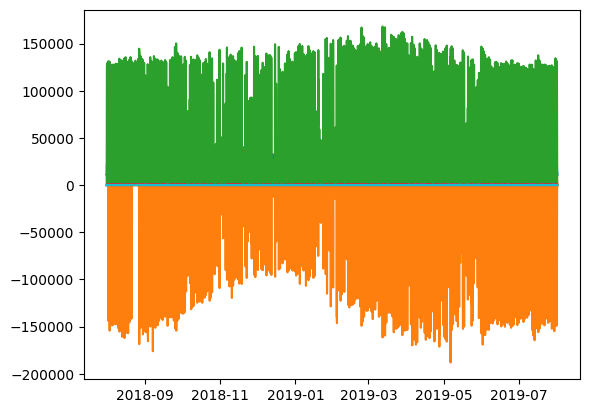

In [62]:
plt.plot(res)